In [1]:
!pip install xgboost
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv("/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_1.csv")
data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_2.csv")])
data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_3.csv")])
data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_4.csv")])

<ipython-input-4-58268d3b2303>:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_1.csv")
<ipython-input-4-58268d3b2303>:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_2.csv")])
<ipython-input-4-58268d3b2303>:3: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_3.csv")])
<ipython-input-4-58268d3b2303>:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_4.csv")])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3668522 entries, 0 to 668521
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   pkSeqID                           int64  
 1   stime                             float64
 2   flgs                              object 
 3   flgs_number                       int64  
 4   proto                             object 
 5   proto_number                      int64  
 6   saddr                             object 
 7   sport                             object 
 8   daddr                             object 
 9   dport                             object 
 10  pkts                              int64  
 11  bytes                             int64  
 12  state                             object 
 13  state_number                      int64  
 14  ltime                             float64
 15  seq                               int64  
 16  dur                               float64


In [ ]:
data.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.12704,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.12704,96,75,1.135260,1.129970,770,602,1,DoS,HTTP


In [ ]:
data.columns

Index(['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory'],
      dtype='object')

In [5]:
data=data.drop(columns=["pkSeqID","stime","flgs","proto","saddr","sport","daddr","dport","state","ltime","seq"])

In [ ]:
data['category'].value_counts()

,count
category,
DDoS,1926624
DoS,1650260
Reconnaissance,91082
Normal,477
Theft,79


In [ ]:
data.describe()

,flgs_number,proto_number,pkts,bytes,state_number,dur,mean,stddev,sum,min,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,...,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06
mean,1.490206e+00,2.095884e+00,7.725963e+00,8.690501e+02,3.134390e+00,2.033479e+01,2.231063e+00,8.871499e-01,7.721635e+00,1.017540e+00,...,7.369070e+02,3.327439e+02,2.851832e+02,9.245168e+01,8.253848e+01,4.564945e+02,5.385196e+02,6.422897e+02,5.859984e+02,9.998700e-01
std,8.652444e-01,9.990837e-01,1.155876e+02,1.122667e+05,1.186971e+00,2.148764e+01,1.517728e+00,8.037139e-01,7.616199e+00,1.483688e+00,...,6.527134e+02,8.466031e+03,4.096943e+03,1.817643e+01,2.439739e+01,1.432917e+04,1.569824e+04,4.533432e+02,4.332619e+02,1.140212e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,5.000000e+00,4.200000e+02,3.000000e+00,1.256256e+01,1.819670e-01,3.001900e-02,3.445982e-01,0.000000e+00,...,5.000000e+02,2.359950e-01,2.436680e-01,1.000000e+02,6.900000e+01,2.314810e-01,2.457730e-01,3.240000e+02,2.940000e+02,1.000000e+00
50%,1.000000e+00,3.000000e+00,7.000000e+00,6.000000e+02,4.000000e+00,1.550852e+01,2.690125e+00,7.938960e-01,8.269959e+00,0.000000e+00,...,7.000000e+02,3.900890e-01,3.986290e-01,1.000000e+02,1.000000e+02,3.785910e-01,3.943060e-01,6.000000e+02,5.000000e+02,1.000000e+00
75%,2.000000e+00,3.000000e+00,9.000000e+00,7.700000e+02,4.000000e+00,2.709986e+01,3.565203e+00,1.745296e+00,1.171040e+01,2.151138e+00,...,9.200000e+02,5.725580e-01,5.796390e-01,1.000000e+02,1.000000e+02,5.725550e-01,5.769710e-01,8.280000e+02,8.000000e+02,1.000000e+00
max,9.000000e+00,5.000000e+00,7.005700e+04,7.183334e+07,1.100000e+01,2.771485e+03,4.981882e+00,2.496763e+00,1.913194e+03,4.980471e+00,...,2.444250e+05,2.714290e+06,1.000000e+06,1.000000e+02,1.000000e+02,3.000000e+06,2.000000e+06,1.125440e+05,1.179390e+05,1.000000e+00


In [ ]:
data["attack"].value_counts()

,count
attack,
1,3668045
0,477


In [ ]:
data["subcategory"].value_counts()

,count
subcategory,
UDP,1981230
TCP,1593180
Service_Scan,73168
OS_Fingerprint,17914
HTTP,2474
Normal,477
Keylogging,73
Data_Exfiltration,6


In [6]:
target_features = data[['attack','category','subcategory']]
features= data.drop(['attack','category','subcategory'], axis=1)

In [7]:
le = LabelEncoder()
target_features['category'] = le.fit_transform(target_features['category'])
target_features['subcategory'] = le.fit_transform(target_features['subcategory'])

target_features.head()

<ipython-input-7-1ca8795a88ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_features['category'] = le.fit_transform(target_features['category'])
<ipython-input-7-1ca8795a88ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_features['subcategory'] = le.fit_transform(target_features['subcategory'])


,attack,category,subcategory
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(features,target_features)

In [9]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
class RandomForest:
    def __init__(self,max_depth):
        self.rfc_attack = RandomForestClassifier(max_depth=max_depth)
        self.rfc_category = RandomForestClassifier(max_depth=max_depth)
        self.rfc_subcategory = RandomForestClassifier(max_depth=max_depth)

    def fit(self,X_train,y_train):
        self.rfc_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.rfc_category.fit(features_category,y_train['category'])

        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.rfc_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.rfc_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.rfc_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.rfc_subcategory.predict(test_subcategory)



        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [ ]:
class NaiveBayes:
    def __init__(self):
        self.nb_attack = GaussianNB()
        self.nb_category = GaussianNB()
        self.nb_subcategory = GaussianNB()

    def fit(self,X_train,y_train):
        self.nb_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.nb_category.fit(features_category,y_train['category'])


        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.nb_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.nb_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.nb_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.nb_subcategory.predict(test_subcategory)

        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [ ]:
class DecisionTree:
    def __init__(self,criterion,max_depth=5):
        self.dtree_attack = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
        self.dtree_category = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
        self.dtree_subcategory = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)

    def fit(self,X_train,y_train):
        self.dtree_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.dtree_category.fit(features_category,y_train['category'])

        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.dtree_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.dtree_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.dtree_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.dtree_subcategory.predict(test_subcategory)

        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [ ]:
class GradientBoost:
    def __init__(self):
        self.xgb_attack = XGBClassifier()
        self.xgb_category = XGBClassifier()
        self.xgb_subcategory = XGBClassifier()

    def fit(self,X_train,y_train):
        self.xgb_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.xgb_category.fit(features_category,y_train['category'])

        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.xgb_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.xgb_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.xgb_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.xgb_subcategory.predict(test_subcategory)

        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [ ]:
def display_metrics(y_true, y_pred, title):
  print(f"--- {title} ---")
  print("\nClassification Report:")
  report = classification_report(y_true, y_pred, output_dict=True)
  df = pd.DataFrame(report).transpose()
  print(df[:-3])

  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f"Confusion Matrix for {title}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

  print("Accuracy:",df["precision"][-3])

**Random Forest**

In [ ]:
rf = RandomForest(max_depth=3)
rf.fit(X_train,y_train)

predictions_rfc = rf.predict(X_test)

--- Attack Prediction ---

Classification Report:
   precision    recall  f1-score   support
0   1.000000  0.313725  0.477612     102.0
1   0.999924  1.000000  0.999962  917029.0


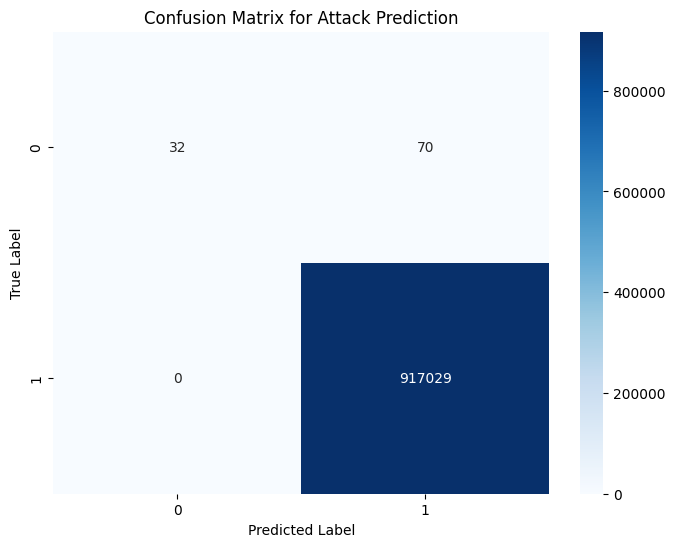

Accuracy: 0.9999236750257051


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:

display_metrics(y_test['attack'], predictions_rfc['attack'], "Attack Prediction")



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Category Prediction ---

Classification Report:
   precision    recall  f1-score   support
0   0.955671  0.908888  0.931692  481582.0
1   0.899639  0.956436  0.927169  412590.0
2   0.000000  0.000000  0.000000     102.0
3   0.996534  0.894218  0.942608   22830.0
4   0.000000  0.000000  0.000000      27.0


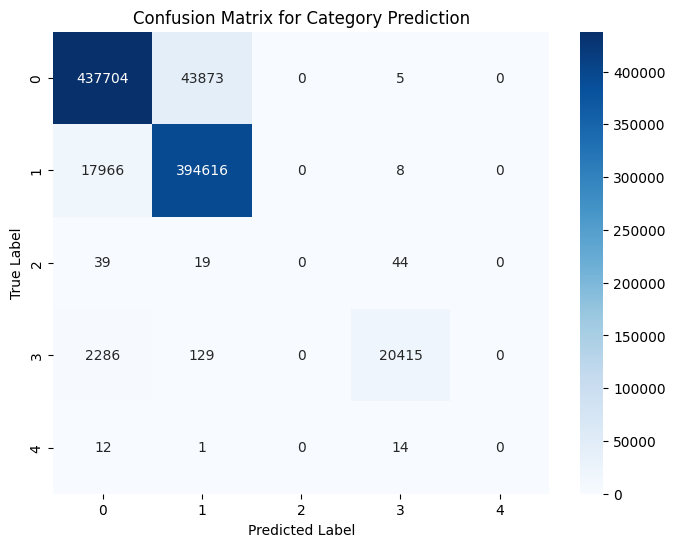

Accuracy: 0.9297853850758506


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['category'], predictions_rfc['category'], "Category Prediction")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Subcategory Prediction ---

Classification Report:
   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000       2.0
1   0.000000  0.000000  0.000000     641.0
2   0.000000  0.000000  0.000000      25.0
3   0.000000  0.000000  0.000000     102.0
4   0.000000  0.000000  0.000000    4487.0
5   0.805650  0.967017  0.878989   18343.0
6   0.996035  0.999990  0.998008  398379.0
7   0.999986  0.999988  0.999987  495152.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


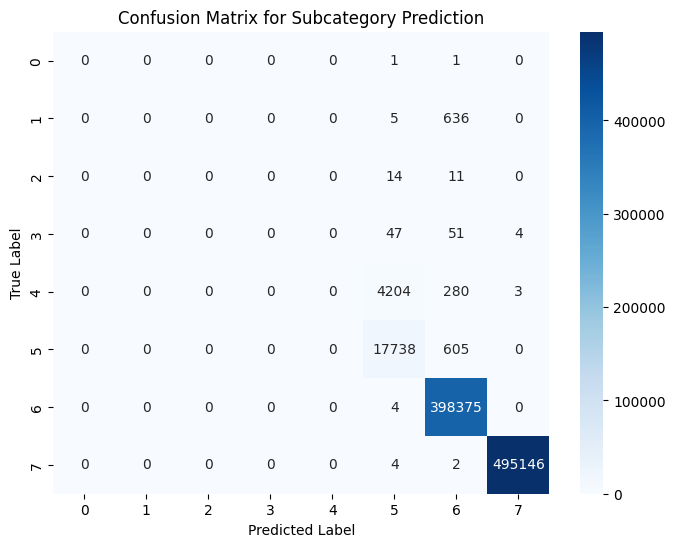

Accuracy: 0.9935974250134386


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['subcategory'], predictions_rfc['subcategory'], "Subcategory Prediction")

Naive Bayes

In [ ]:
nb = NaiveBayes()
nb.fit(X_train,y_train)

predictions_nb = nb.predict(X_test)

--- Attack ---

Classification Report:
   precision    recall  f1-score   support
0   0.127941  0.852941  0.222506     102.0
1   0.999984  0.999353  0.999668  917029.0


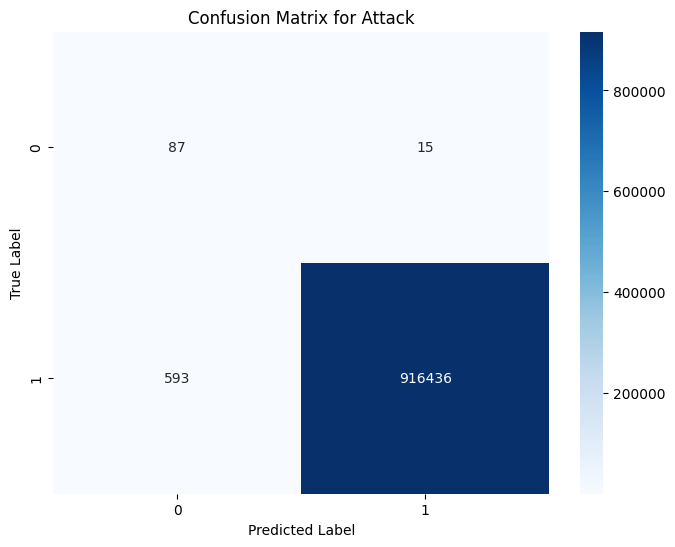

Accuracy: 0.9993370630804106


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['attack'], predictions_nb['attack'], title="Attack")

--- Category ---

Classification Report:
   precision    recall  f1-score   support
0   0.663869  0.950642  0.781787  481582.0
1   0.878043  0.437032  0.583591  412590.0
2   0.127941  0.852941  0.222506     102.0
3   0.919807  0.859615  0.888693   22830.0
4   0.111888  0.592593  0.188235      27.0


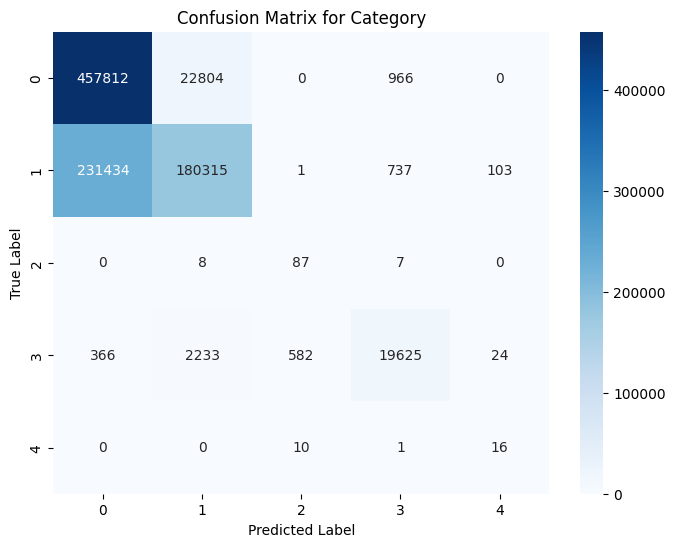

Accuracy: 0.7172966566390189


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['category'], predictions_nb['category'], title="Category")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Subcategory ---

Classification Report:
   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000       2.0
1   0.176685  0.981279  0.299453     641.0
2   0.111888  0.640000  0.190476      25.0
3   0.127941  0.852941  0.222506     102.0
4   0.285279  0.917762  0.435261    4487.0
5   0.889833  0.319686  0.470381   18343.0
6   0.998384  0.993853  0.996113  398379.0
7   0.999974  0.999974  0.999974  495152.0


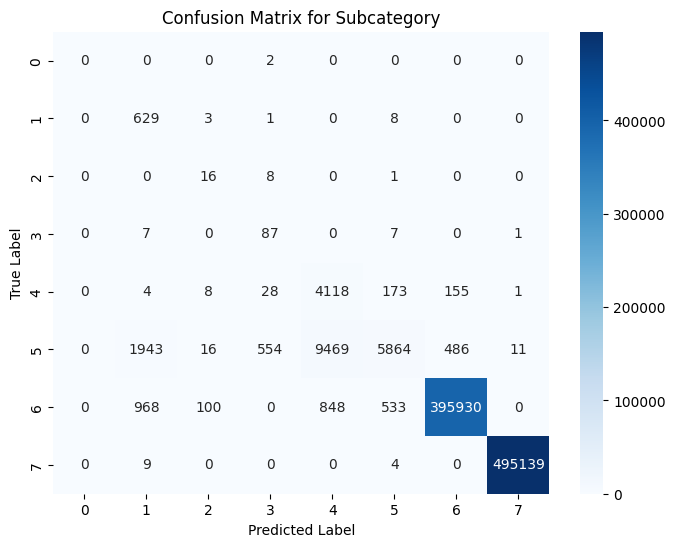

Accuracy: 0.9832652042074688


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['subcategory'], predictions_nb['subcategory'], title="Subcategory")

**Decision Tree **

In [ ]:
dtree = DecisionTree("gini")
dtree.fit(X_train,y_train)
predictions_dtree = dtree.predict(X_test)

--- Attack ---

Classification Report:
   precision    recall  f1-score   support
0    0.96875  0.911765  0.939394     102.0
1    0.99999  0.999997  0.999993  917029.0


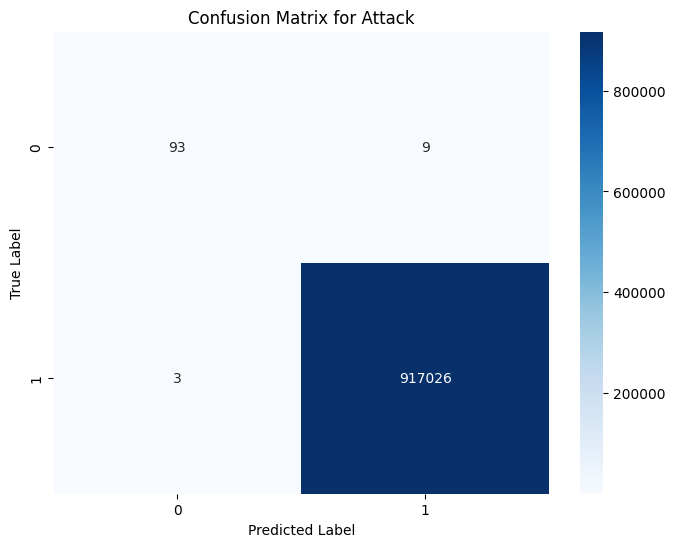

Accuracy: 0.9999869157186924


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['attack'], predictions_dtree['attack'], title="Attack")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---  Category ---

Classification Report:
   precision    recall  f1-score   support
0   0.993147  0.984636  0.988873  481582.0
1   0.982133  0.992285  0.987183  412590.0
2   0.953846  0.607843  0.742515     102.0
3   0.993892  0.990670  0.992278   22830.0
4   0.000000  0.000000  0.000000      27.0


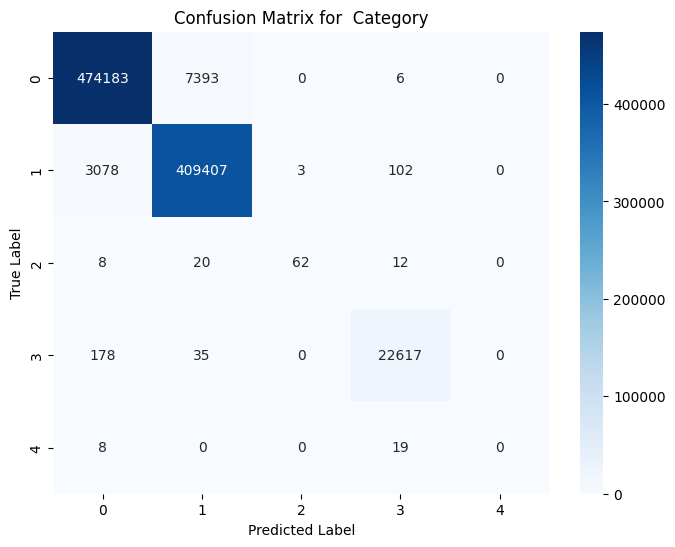

Accuracy: 0.9881565447029923


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['category'], predictions_dtree['category'], title=" Category")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---  Subcategory ---

Classification Report:
   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000       2.0
1   0.886713  0.989080  0.935103     641.0
2   0.000000  0.000000  0.000000      25.0
3   0.984615  0.627451  0.766467     102.0
4   0.755258  0.352128  0.480316    4487.0
5   0.859901  0.968707  0.911067   18343.0
6   0.999674  0.999744  0.999709  398379.0
7   0.999919  0.999992  0.999956  495152.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


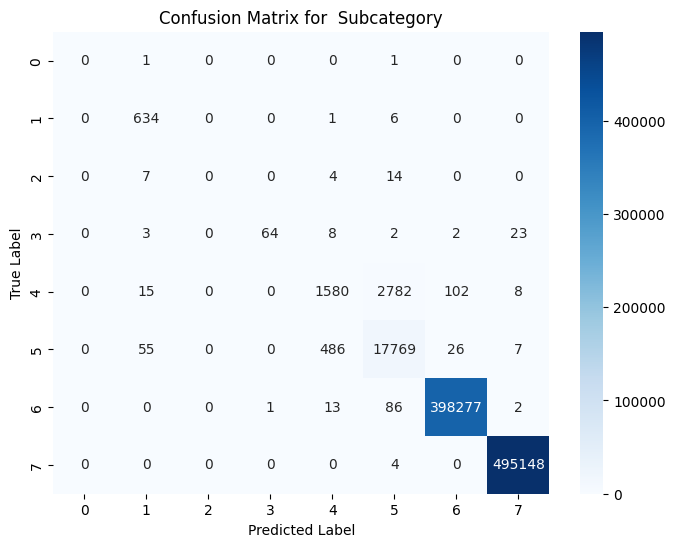

Accuracy: 0.9960103845579312


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['subcategory'], predictions_dtree['subcategory'], title=" Subcategory")

**Gradient Boost**

In [ ]:
xgb = GradientBoost()
xgb.fit(X_train,y_train)
predictions_xgb = xgb.predict(X_test)

--- Attack ---

Classification Report:
   precision    recall  f1-score   support
0   0.830189  0.862745  0.846154     102.0
1   0.999985  0.999980  0.999983  917029.0


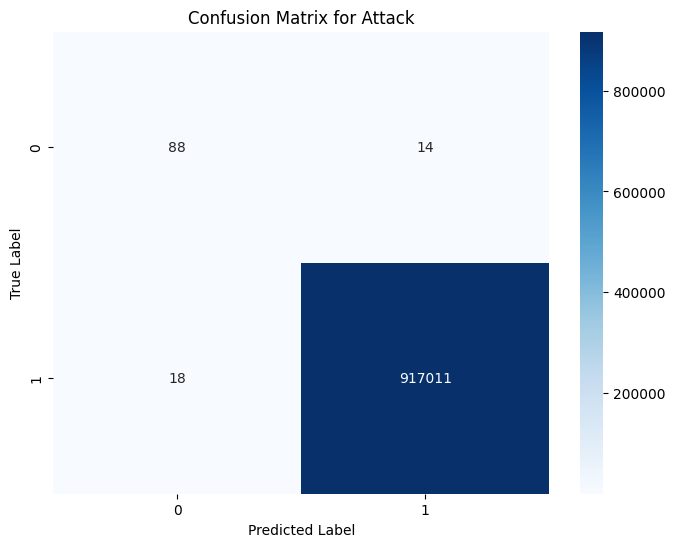

Accuracy: 0.9999651085831796


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['attack'], predictions_xgb['attack'], title="Attack")

--- Category ---

Classification Report:
   precision    recall  f1-score   support
0   0.999985  0.999778  0.999882  481582.0
1   0.999731  0.999985  0.999858  412590.0
2   0.907216  0.862745  0.884422     102.0
3   0.999606  0.999693  0.999650   22830.0
4   0.960000  0.888889  0.923077      27.0


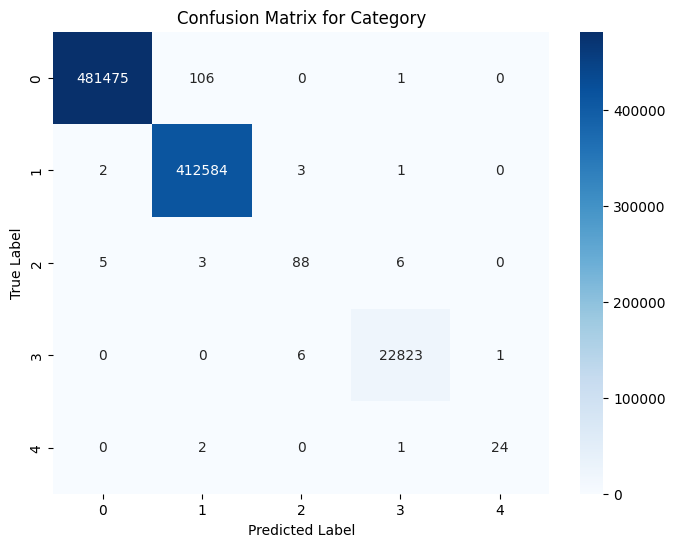

Accuracy: 0.9998506211217373


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['category'], predictions_xgb['category'], title="Category")

--- Subcategory ---

Classification Report:
   precision    recall  f1-score   support
0   1.000000  1.000000  1.000000       2.0
1   1.000000  0.990640  0.995298     641.0
2   0.956522  0.880000  0.916667      25.0
3   0.907216  0.862745  0.884422     102.0
4   0.969811  0.687319  0.804487    4487.0
5   0.928506  0.994766  0.960495   18343.0
6   0.999987  0.999997  0.999992  398379.0
7   0.999984  0.999998  0.999991  495152.0


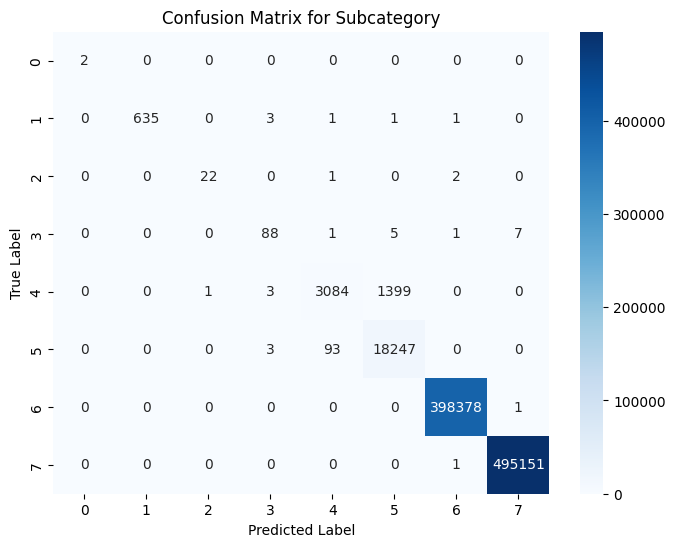

Accuracy: 0.9983382962739238


<ipython-input-35-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [ ]:
display_metrics(y_test['subcategory'], predictions_xgb['subcategory'], title="Subcategory")

In [10]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
rf = RandomForestClassifier()

# Step 3: Define meta-model (can also be LogisticRegression)
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Step 4: Build stacking ensemble
stacked = StackingClassifier(
    estimators=[('xgb', xgb), ('rf', rf)],
    final_estimator=meta_model,
    cv=5
)

# Step 5: Train and evaluate
stacked.fit(X_train, y_train["subcategory"])
y_pred = stacked.predict(X_test)
y_pred.summary()

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:44:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:53:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:54:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:55:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:56:29] WARNING: /w

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

In [16]:
y_pred.summary

AttributeError: 'numpy.ndarray' object has no attribute 'summary'